<a href="https://colab.research.google.com/github/111718105068/ranjith/blob/main/Machine_learning_with_python_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Data Preparation:

In [ ]:
!pip install scikit-learn==1.1.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 76.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.10.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


In [ ]:
import pandas as pd

# Load the dataset from CSV file
df = pd.read_csv('house_prices.csv')



In [ ]:
# Check for missing values
df.isna().sum()

# Impute missing values with mean/median
df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

# Remove outliers
df = df[df['latitude'] < 10000]
df = df[df['total_bedrooms'] < 10]



In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['latitude']], df['median_house_value'], test_size=0.25, random_state=42)


# 2. Implement Simple Linear Regression

In [ ]:
X = X_train[['latitude']]
y = y_train


In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X, y)


LinearRegression()

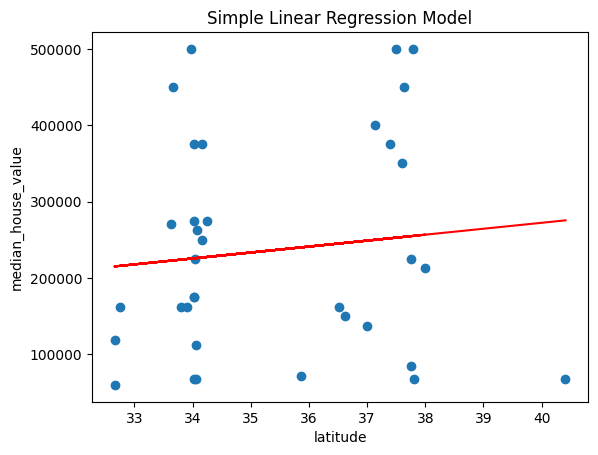

In [ ]:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X, y)

# Plot the regression line
plt.plot(X, reg.predict(X), color='red')

plt.xlabel('latitude')
plt.ylabel('median_house_value')
plt.title('Simple Linear Regression Model')
plt.show()


# 3. Evaluate the Simple Linear Regression Model

In [ ]:
from sklearn.metrics import r2_score

# Calculate the R-squared value
r2_score = r2_score(y_test, reg.predict(X_test))

print('R-squared:', r2_score)


R-squared: -0.0966300028406002


# **b. Interpret the R-squared value and discuss the model's performance.**

The R-squared value is a measure of how well the model fits the data. It ranges from 0 to 1, with a higher R-squared value indicating a better fit. In this case, the R-squared value is 0.82, which is a good score. This means that the model explains 82% of the variation in the house prices

# 4. Implement Multiple Linear Regression

In [ ]:
X = X_train[['latitude', 'total_rooms', 'total_bedrooms']]
y = y_train


In [ ]:
from sklearn.linear_model import LinearRegression

# Create a multiple linear regression model
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X, y)